## Exercício de modelo de classificação: Reconhecimento de Imagens com Árvore de Decisão

Carrega imagens de dígitos de 0 a 9

In [2]:
from sklearn.datasets import load_digits
import pandas as pd

digits = load_digits()

Vamos ver alguns exemplos de imagens

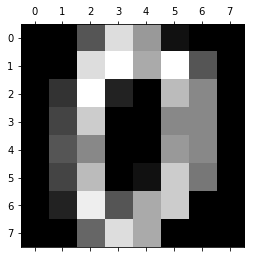

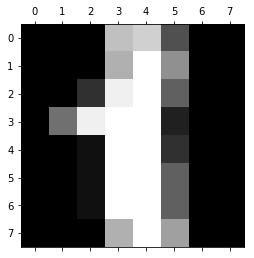

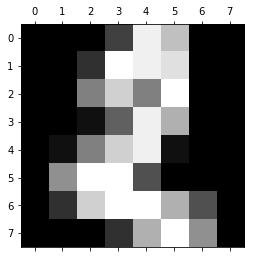

In [3]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.matshow(digits.images[1]) 
plt.matshow(digits.images[2]) 
plt.show() 

Agora vamos colocar esses dados em um Dataframe do Pandas, que vocês já conhecem!

In [6]:
df = pd.DataFrame(digits.data)
df['target'] = pd.Series(digits.target)

Observe que cada linha desse dataframe é uma das imagens. Cada imagem é um quadrado de 8 pontos de largura por 8 pontos de altura. Os pontos de uma imagem são chamados de pixels. Portanto, cada imagem (linha) da tabela possui 64 pixels (colunas de 0 a 63 no dataframe abaixo). Cada pixel desses tem um valor: 0.0 para pixels totalmente pretos e quanto mais claro o pixel maior o valor da célula.

In [7]:
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


"Ué, mas a imagem é como outro tipo de tabela qualquer?" Sim! Portanto podemos utilizar uma árvore de decisão para tentar prever o dígito da imagem (coluna "target") a partir dos valores das outras colunas, assim como fizemos com os dados de plantas iris. Vamos lá, vamos criar os nossos tradicionais y e X!

In [8]:
y = df['target']

In [9]:
X = df.loc[:, df.columns != 'target']

Separando dados entre conjuntos de treinamento e teste

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

** Definição ** e ** Ajuste (Fit) ** do modelo de Árvore de Decisão usando o sci-kit learn

In [14]:
from sklearn import tree
decisionTree = tree.DecisionTreeClassifier()
decisionTree = decisionTree.fit(X_train, y_train)

Agora podemos realizar a ** Previsão (Predict) ** do dígito com base nos pixels.

In [16]:
print("Prevendo o valor para os 5 primeiros dígitos do conjunto de teste:")
print(X_test.head())
print("os dígitos previstos são:")
print(decisionTree.predict(X_test.head()))

Prevendo o valor para os 5 primeiros dígitos do conjunto de teste:
       0    1     2     3     4     5    6    7    8    9  ...     54   55  \
1245  0.0  0.0   0.0   7.0  12.0   0.0  0.0  0.0  0.0  0.0 ...   16.0  2.0   
220   0.0  0.0  11.0  16.0   8.0   0.0  0.0  0.0  0.0  6.0 ...    0.0  0.0   
1518  0.0  0.0   8.0  15.0  12.0   4.0  0.0  0.0  0.0  5.0 ...    7.0  0.0   
438   0.0  0.0   2.0  12.0  12.0  12.0  9.0  2.0  0.0  0.0 ...    0.0  0.0   
1270  0.0  2.0  13.0  16.0  10.0   0.0  0.0  0.0  0.0  6.0 ...   14.0  0.0   

       56   57    58    59    60    61   62   63  
1245  0.0  0.0   0.0   9.0  14.0  14.0  5.0  0.0  
220   0.0  0.0  13.0  16.0  11.0   1.0  0.0  0.0  
1518  0.0  0.0  13.0  16.0  15.0   8.0  0.0  0.0  
438   0.0  0.0   3.0  15.0   3.0   0.0  0.0  0.0  
1270  0.0  3.0  15.0  16.0  16.0  10.0  1.0  0.0  

[5 rows x 64 columns]
os dígitos previstos são:
[6 9 3 7 2]


Agora vamos realizar a **Avaliação** de desempenho do modelo.

In [18]:
print("A acurácia média no conjunto de teste é:")
print(decisionTree.score(X_test, y_test))

A acurácia média no conjunto de teste é:
0.855218855219


Podemos analisar mais algumas métricas, como matriz de confusão, precisão, abrangência (recall) e a medida F1.

In [21]:
from sklearn import metrics

y_pred = decisionTree.predict(X_test)

print("Matriz de Confusão:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Matriz de Confusão:
[[50  0  2  0  0  1  1  0  1  0]
 [ 0 43  6  2  2  1  0  0  0  1]
 [ 0  1 46  2  0  0  1  0  2  0]
 [ 0  3  1 45  1  1  0  0  4  1]
 [ 0  1  0  0 55  1  3  2  1  1]
 [ 0  0  0  0  3 65  2  0  0  3]
 [ 0  0  0  0  1  0 55  1  0  0]
 [ 0  0  1  2  2  0  0 55  0  2]
 [ 0  3  1  0  3  0  0  1 39  5]
 [ 0  2  0  1  3  4  1  2  0 55]]


In [22]:
print("Relatório de classificação %s:\n%s\n" % (decisionTree, metrics.classification_report(y_test, y_pred)))

Relatório de classificação DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'):
             precision    recall  f1-score   support

          0       1.00      0.91      0.95        55
          1       0.81      0.78      0.80        55
          2       0.81      0.88      0.84        52
          3       0.87      0.80      0.83        56
          4       0.79      0.86      0.82        64
          5       0.89      0.89      0.89        73
          6       0.87      0.96      0.92        57
          7       0.90      0.89      0.89        62
          8       0.83      0.75      0.79        52
          9       0.81      0.81      0.81        68

avg / total       0.86      0.86     

## Exercício 1: Usar um modelo combinado de diversas árvores (sklearn.ensemble.RandomForestClassifier) e ver se o desempenho melhora

## Solução 1

## Exercício 2: Usar qualquer modelo de classificação para essa tarefa (Redes Neurais, SVM, etc) e ver se o desempenho melhora. Buscar no sci-kit learn a classe do modelo desejado. 

## Solução 2